In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
os.chdir("C:/Users/riddh/OneDrive/Documents/Erdos_Institute/First_project")
df21=pd.read_csv('FEVS2021_PRDF_CSV/2021_OPM_FEVS_PRDF.csv')
df21.head()

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842


In [14]:
df21.drop_duplicates()
df21_c  = df21.copy()
print(df21_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        290770 non-null  object 
 7   Q6        286449 non-null  object 
 8   Q7        290240 non-null  object 
 9   Q8        291451 non-null  object 
 10  Q9        291910 non-null  float64
 11  Q10       292038 non-null  object 
 12  Q11       292018 non-null  object 
 13  Q12       291755 non-null  object 
 14  Q13       291920 non-null  object 
 15  Q14       291306 non-null  object 
 16  Q15       288257 non-null  object 
 17  Q16       290367 non-null  object 
 18  Q17       290268 non-null  object 
 19  Q18       291274 non-null  object 
 20  Q19 

In [15]:
#creating a dataset of missing values
missing21=df21_c[df21_c.isnull().any(axis=1)]
missing21.head()

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842
8,190481568495,XX,4.0,5.0,5.0,4.0,2,4,5,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.089288
11,102302785265,XX,4.0,3.0,4.0,4.0,3,4,4,3,...,NaN,NaN,B,B,B,B,A,A,A,1.228573


In [16]:
#calculating total missing values
df21_c.isnull().sum().sum()

754297

In [18]:
#Dropping missing values
df21_c = df21_c.dropna()
df21_c.isnull().sum().sum()

0

In [19]:
## Extracting all the values which should be integer but are not
objects= [column for column, is_type in (df21_c.dtypes=="object").items() if is_type]
objects.remove('agency')
print(objects)
for i in objects[:-9]:
    df21_c[i] = df21_c[i].replace(['X'], 0)
    a=df21_c[i].mode()
    df21_c[i] = df21_c[i].replace(0,int(a))
    df21_c[i] = df21_c[i].astype(float)

['Q5', 'Q6', 'Q7', 'Q8', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q24', 'Q25', 'Q26', 'Q27', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q55', 'Q56', 'Q57', 'DRNO', 'DHISP', 'DDIS', 'DAGEGRP', 'DSUPER', 'DFEDTEN', 'DSEX', 'DMIL', 'DLEAVING']


In [20]:
print(df21_c.info())
#our data has no missing values and it is ready for analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185696 entries, 2 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  185696 non-null  int64  
 1   agency    185696 non-null  object 
 2   Q1        185696 non-null  float64
 3   Q2        185696 non-null  float64
 4   Q3        185696 non-null  float64
 5   Q4        185696 non-null  float64
 6   Q5        185696 non-null  float64
 7   Q6        185696 non-null  float64
 8   Q7        185696 non-null  float64
 9   Q8        185696 non-null  float64
 10  Q9        185696 non-null  float64
 11  Q10       185696 non-null  float64
 12  Q11       185696 non-null  float64
 13  Q12       185696 non-null  float64
 14  Q13       185696 non-null  float64
 15  Q14       185696 non-null  float64
 16  Q15       185696 non-null  float64
 17  Q16       185696 non-null  float64
 18  Q17       185696 non-null  float64
 19  Q18       185696 non-null  float64
 20  Q19 

<AxesSubplot:xlabel='count', ylabel='agency'>

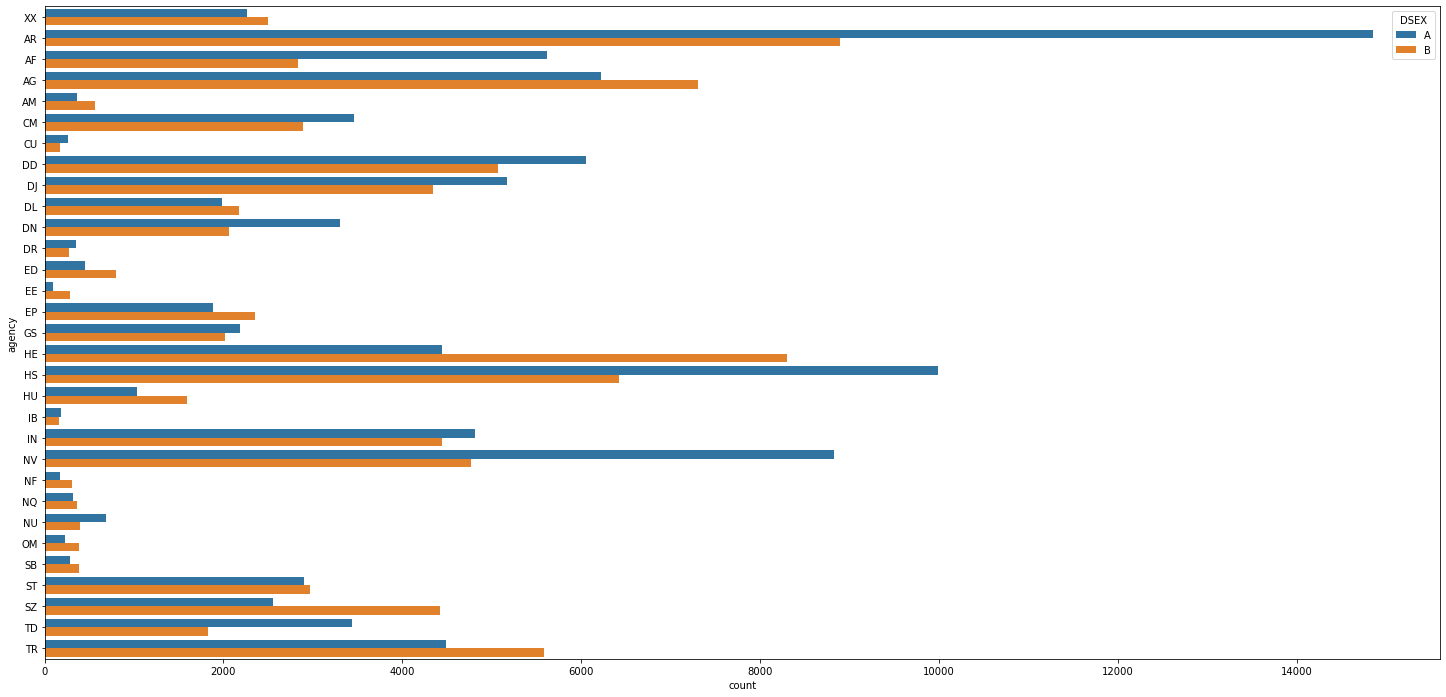

In [21]:
import seaborn as sns
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DSEX')

<AxesSubplot:xlabel='count', ylabel='agency'>

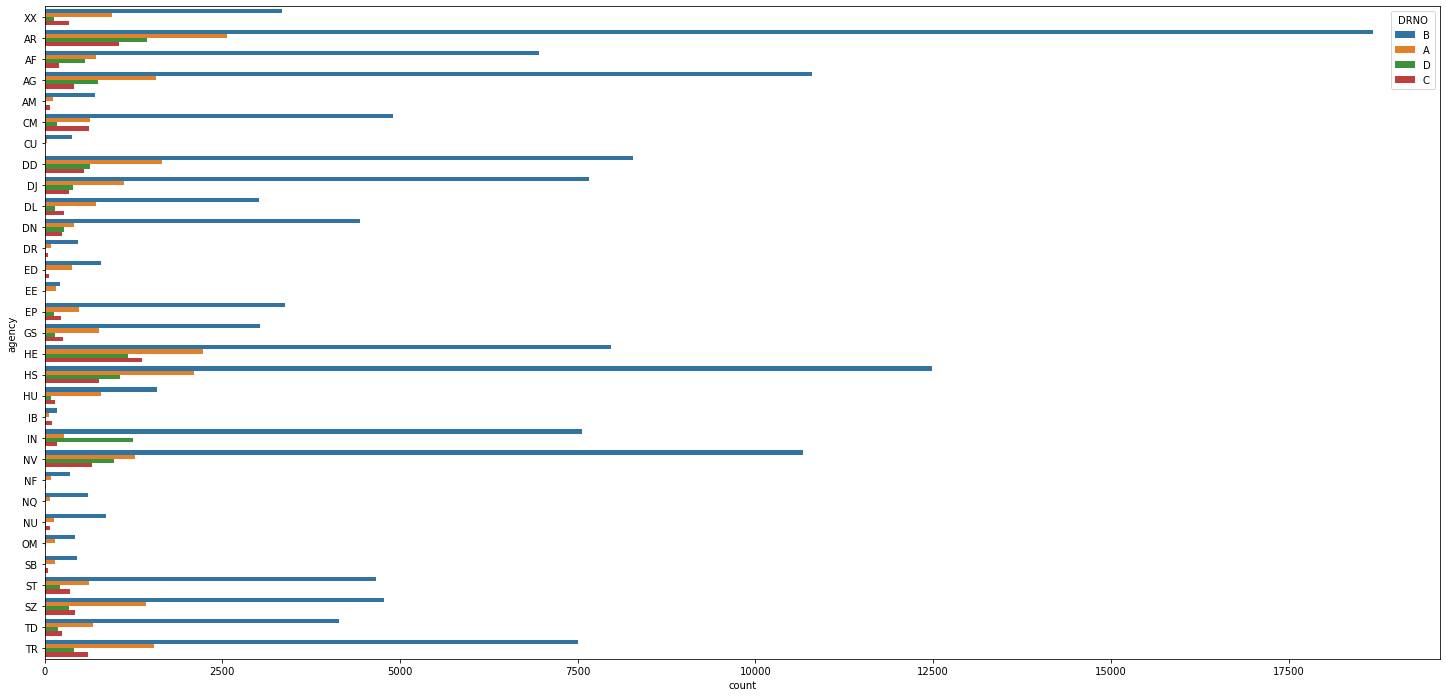

In [22]:
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DRNO')

<AxesSubplot:xlabel='count', ylabel='agency'>

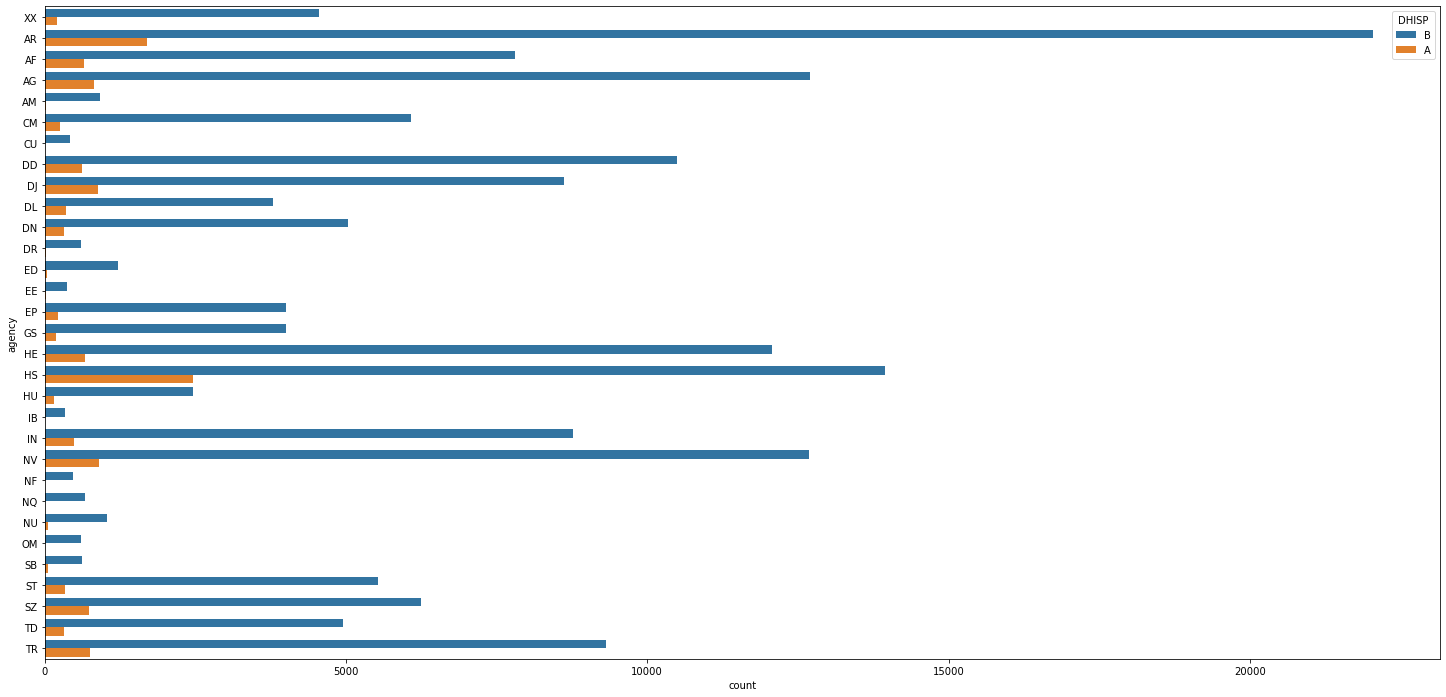

In [23]:
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DHISP')

<AxesSubplot:xlabel='count', ylabel='agency'>

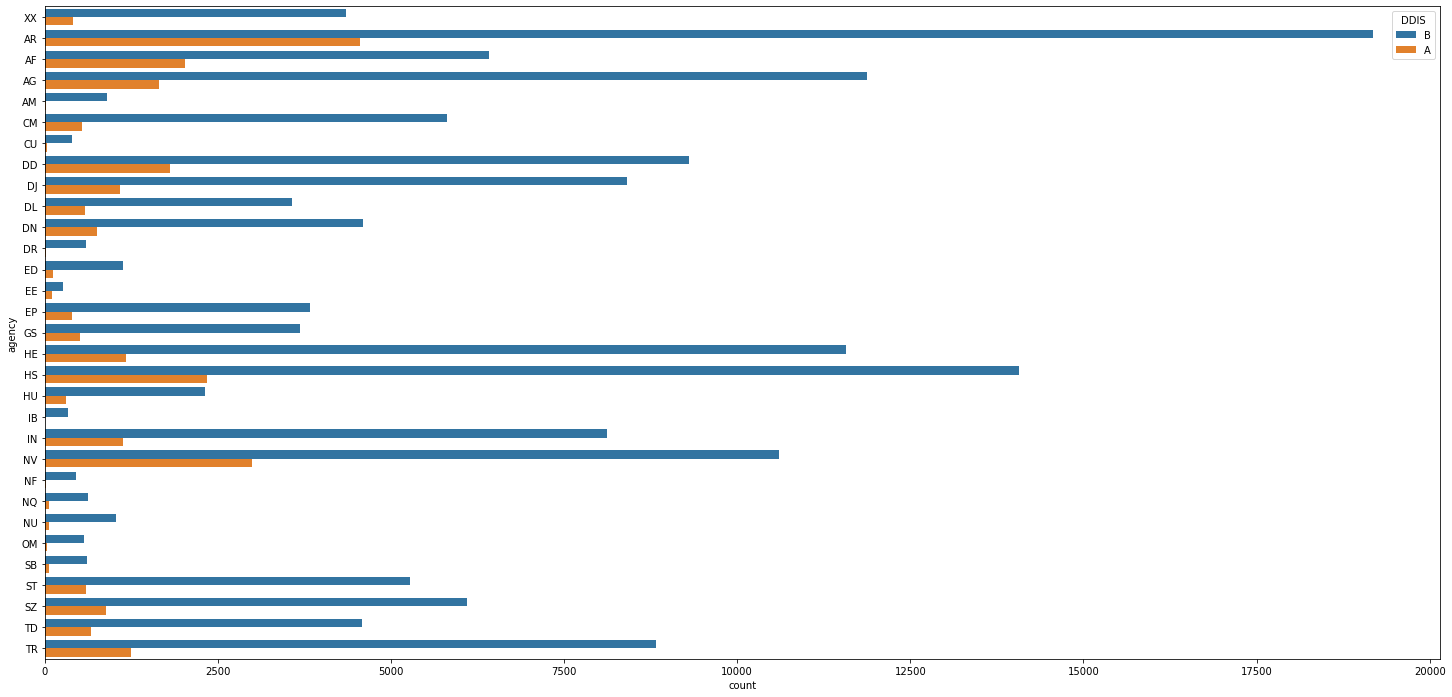

In [24]:
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DDIS')

<AxesSubplot:xlabel='count', ylabel='agency'>

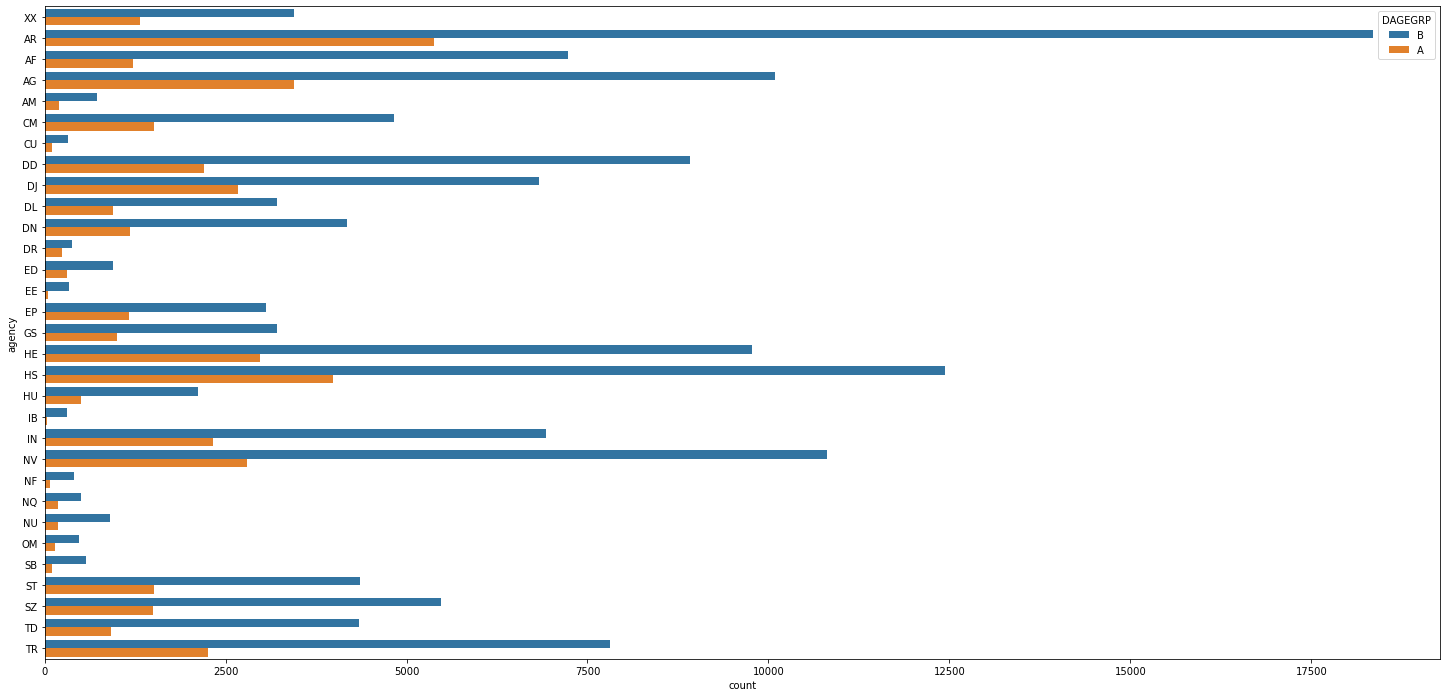

In [25]:
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DAGEGRP')

<AxesSubplot:xlabel='count', ylabel='agency'>

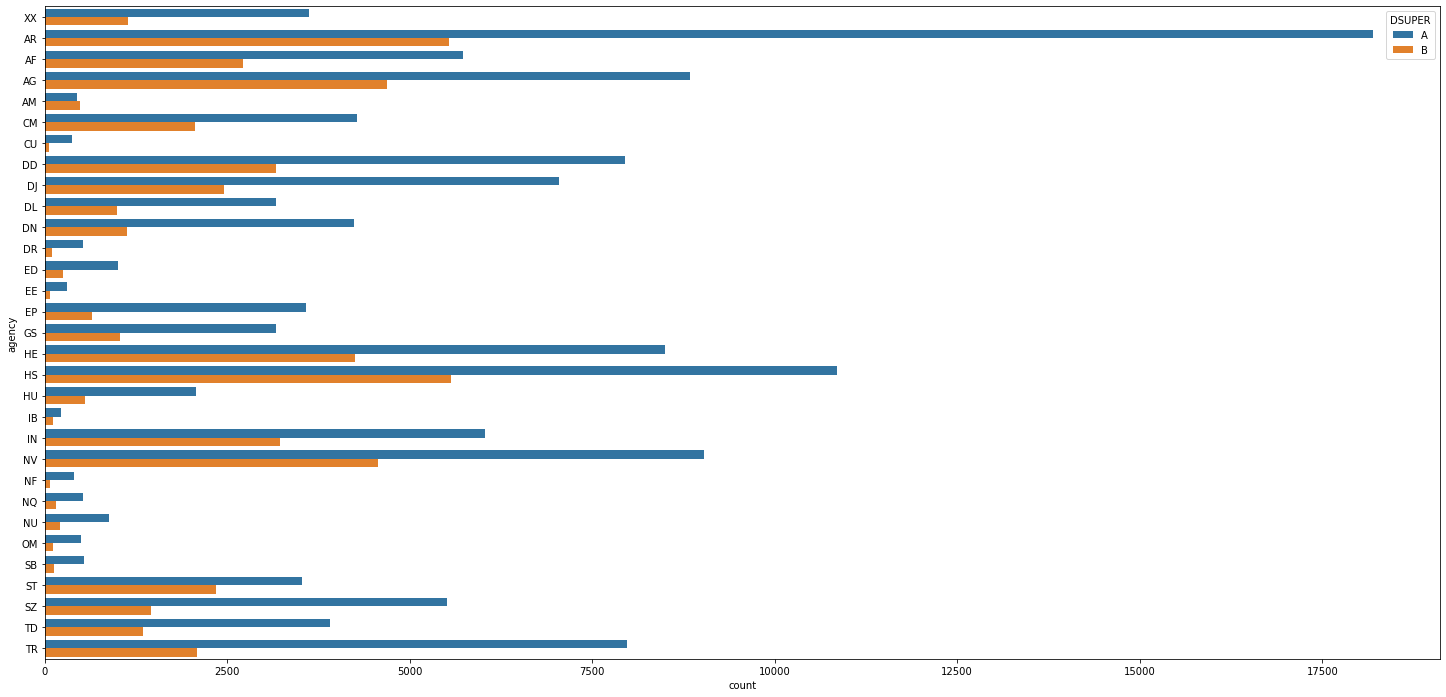

In [26]:
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DSUPER')

<AxesSubplot:xlabel='count', ylabel='agency'>

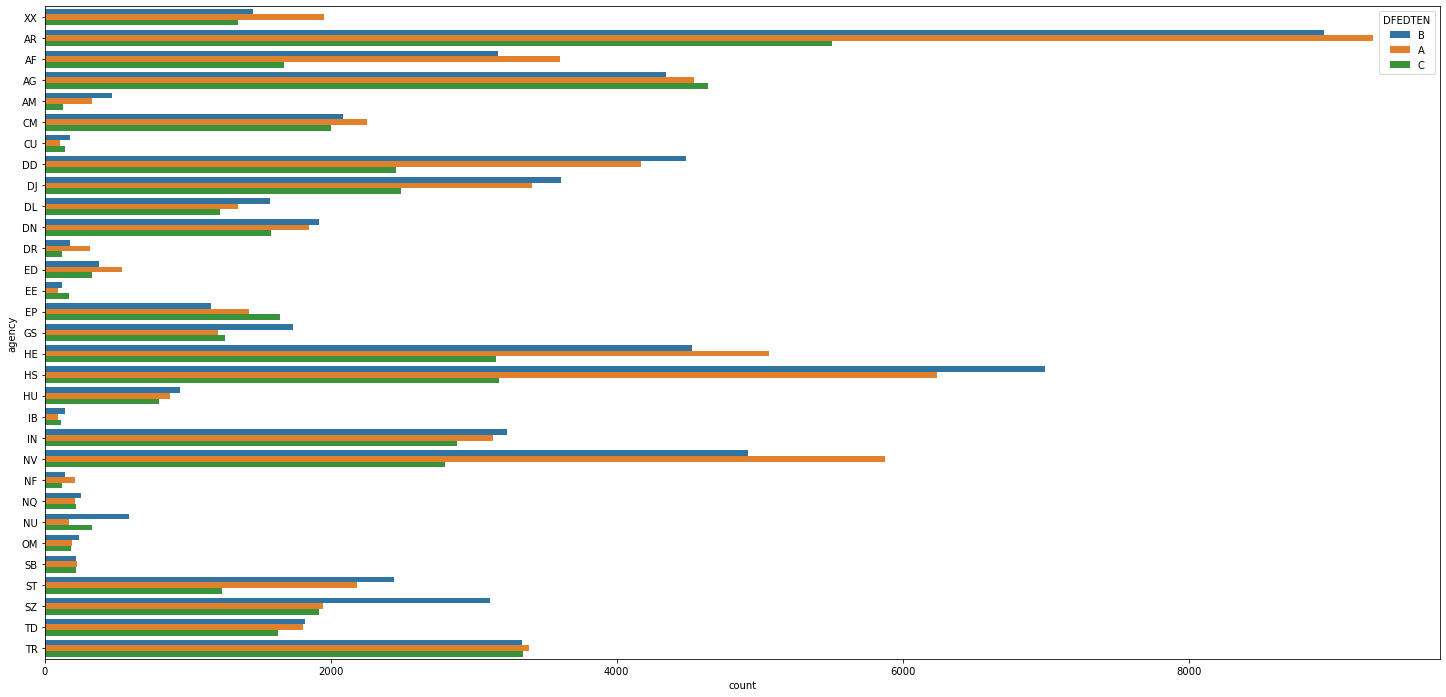

In [27]:
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DFEDTEN')

<AxesSubplot:xlabel='count', ylabel='agency'>

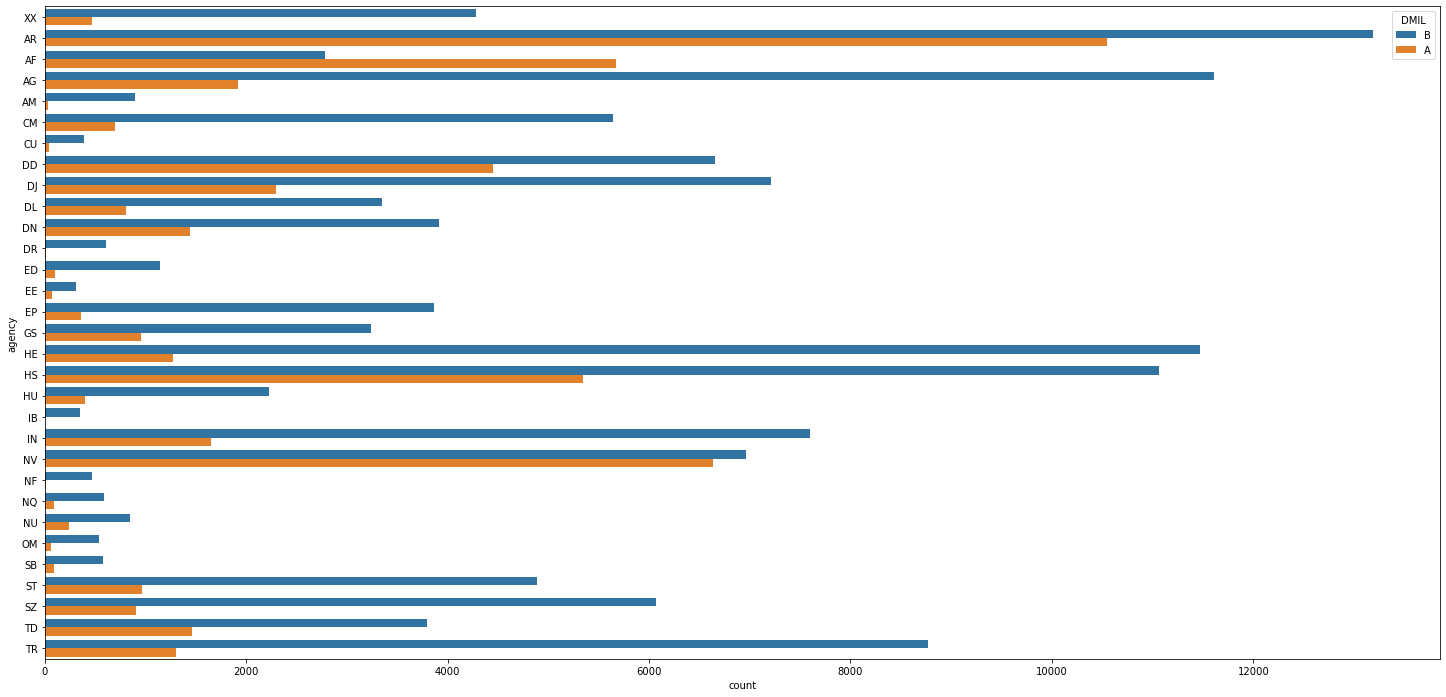

In [28]:
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DMIL')

<AxesSubplot:xlabel='count', ylabel='agency'>

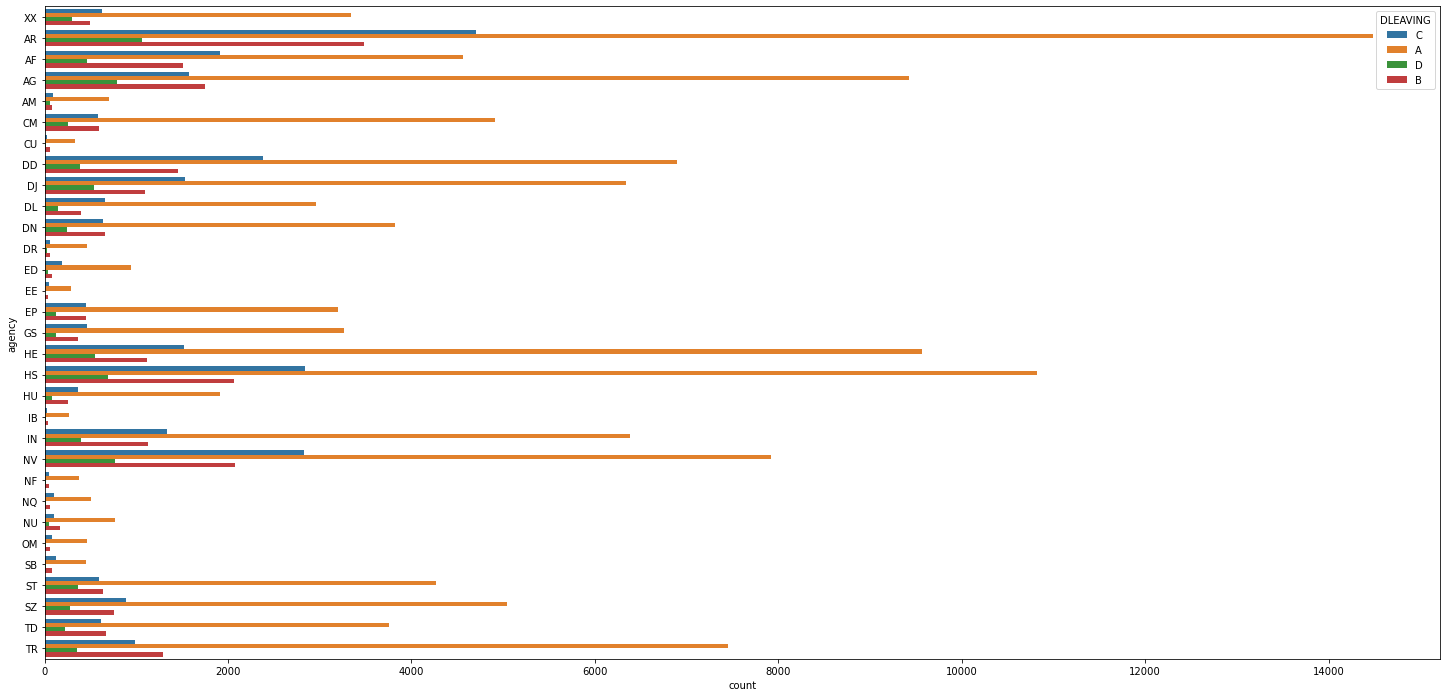

In [29]:
plt.figure(figsize=(25,12))
sns.countplot(data=df21_c,y=df21_c['agency'],hue='DLEAVING')